In [1]:
import lava
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mod_one_exchange_new import mod_one_exchange_approximation_new
import graph_col_dimacs_reader as reader
import goemans_williamson_sdp as gw_sdp
import scipy
import matplotlib
import re
import time
import sys

In [13]:
def graph_to_mat(G, path = 'test_graphs/default2.mat'):
    # get the adjancency matrix of the graph
    adj = nx.adjacency_matrix(G).todense()
    adj = np.asarray(adj, dtype=np.int32)
    scipy.io.savemat(path, {'M': adj})   # M for matrix, to stay consistent with the .mat files we already have
    return

def mat_to_graph(path):
    mat = scipy.io.loadmat(path)
    G = nx.from_numpy_array(mat['M'])
    return G

In [48]:
# for graph names in col_graph_names2, use networkx graph coloring approximation algorithms
# Strategies: 'largest_first'

# 'random_sequential'

# 'smallest_last'

# 'independent_set'

# 'connected_sequential_bfs'

# 'connected_sequential_dfs'

# 'connected_sequential' (alias for the previous strategy)

# 'saturation_largest_first'

# 'DSATUR' (alias for the previous strategy)

col_graph_names = ['dsjc125.1','dsjc125.5','dsjc250.5','dsjc500.1','dsjc500.5','dsjc500.9','dsjc1000.1','dsjc1000.5','dsjc1000.9','dsjr500.1c','dsjr500.5','flat300_28_0','flat1000_50_0','flat1000_60_0','flat1000_76_0','latin_square','le450_25c','le450_25d','myciel6','myciel7','queen6_6','r250.5','r1000.1c','r1000.5']
col_graph_names2 = ['dsjc1000.9']

colors_random_sequential = []
colors_largest_first = []
colors_smallest_last = []
colors_independent_set = []
colors_connected_sequential_bfs = []
colors_connected_sequential_dfs = []
colors_connected_sequential = []
colors_saturation_largest_first = []
colors_DSATUR = []
colors_interchange = []
for graph in col_graph_names2:
    G = mat_to_graph('test_graphs/' + graph + '.mat')
    print("Graph: ", graph)
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())
    print("Density: ", nx.density(G))
    temp_dict = nx.coloring.greedy_color(G, strategy='largest_first')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_largest_first.append(temp_num_colors)

    temp_dict = nx.coloring.greedy_color(G, strategy='random_sequential')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_random_sequential.append(temp_num_colors)

    temp_dict = nx.coloring.greedy_color(G, strategy='smallest_last')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_smallest_last.append(temp_num_colors)    

    temp_dict = nx.coloring.greedy_color(G, strategy='independent_set')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_independent_set.append(temp_num_colors)

    temp_dict = nx.coloring.greedy_color(G, strategy='connected_sequential_bfs')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_connected_sequential_bfs.append(temp_num_colors)

    temp_dict = nx.coloring.greedy_color(G, strategy='connected_sequential_dfs')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_connected_sequential_dfs.append(temp_num_colors)

    temp_dict = nx.coloring.greedy_color(G, strategy='connected_sequential')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_connected_sequential.append(temp_num_colors)

    temp_dict = nx.coloring.greedy_color(G, strategy='saturation_largest_first')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_saturation_largest_first.append(temp_num_colors)

    temp_dict = nx.coloring.greedy_color(G, strategy='DSATUR')
    temp_num_colors =  len(set(temp_dict.values()))
    colors_DSATUR.append(temp_num_colors)

    temp_dict = nx.coloring.greedy_color(G, interchange=True)
    temp_num_colors =  len(set(temp_dict.values()))
    colors_interchange.append(temp_num_colors)
    
    

    



Graph:  dsjc1000.9
Number of nodes:  1000
Number of edges:  449449
Density:  0.8997977977977978


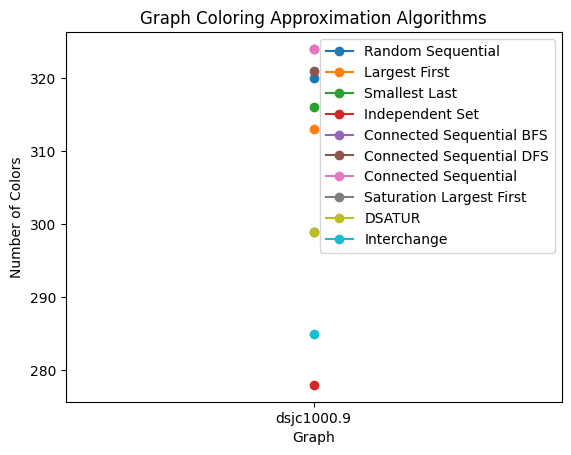

In [51]:
# Plot the results with graph names
plt.figure()
plt.plot(col_graph_names2, colors_random_sequential, label='Random Sequential', marker='o')
plt.plot(col_graph_names2, colors_largest_first, label='Largest First', marker='o')
plt.plot(col_graph_names2, colors_smallest_last, label='Smallest Last', marker='o')
plt.plot(col_graph_names2, colors_independent_set, label='Independent Set', marker='o')
plt.plot(col_graph_names2, colors_connected_sequential_bfs, label='Connected Sequential BFS', marker='o')
plt.plot(col_graph_names2, colors_connected_sequential_dfs, label='Connected Sequential DFS', marker='o')
plt.plot(col_graph_names2, colors_connected_sequential, label='Connected Sequential', marker='o')
plt.plot(col_graph_names2, colors_saturation_largest_first, label='Saturation Largest First', marker='o')
plt.plot(col_graph_names2, colors_DSATUR, label='DSATUR', marker='o')
plt.plot(col_graph_names2, colors_interchange, label='Interchange', marker='o')
plt.xlabel('Graph')
plt.ylabel('Number of Colors')
plt.title('Graph Coloring Approximation Algorithms')
plt.legend()
plt.show()


In [52]:
print("Random Sequential: ", colors_random_sequential)
print("Largest First: ", colors_largest_first)
print("Smallest Last: ", colors_smallest_last)
print("Independent Set: ", colors_independent_set)
print("Connected Sequential BFS: ", colors_connected_sequential_bfs)
print("Connected Sequential DFS: ", colors_connected_sequential_dfs)
print("Connected Sequential: ", colors_connected_sequential)
print("Saturation Largest First: ", colors_saturation_largest_first)
print("DSATUR: ", colors_DSATUR)
print("Interchange: ", colors_interchange)


Random Sequential:  [320]
Largest First:  [313]
Smallest Last:  [316]
Independent Set:  [278]
Connected Sequential BFS:  [324]
Connected Sequential DFS:  [321]
Connected Sequential:  [324]
Saturation Largest First:  [299]
DSATUR:  [299]
Interchange:  [285]
